# Hidalgo Segmentation

Hidalgo (Heterogeneous Intrinsic Dimensionality Algorithm) is a method for detecting change points in time series data. It identifies segments where statistical properties of the data shift, allowing for better understanding of structural changes in the series. It is particularly useful in applications like anomaly detection, financial market analysis, and sensor monitoring for discriminating regions with different local intrinsic dimensionality.

Hidalgo Segmentation is used for

- **Unsupervised Learning**: Hidalgo does not require labeled data for segmentation, making it suitable for exploratory data analysis.
- **High-Dimensional Data**: It can handle high-dimensional time series data effectively.
- **Intrinsic Dimensionality**: By focusing on local intrinsic dimensionality, Hidalgo can identify regions with different complexities within the data.

Applications

- **Change Point Detection**: Identifying points in time where the statistical properties of a time series change.
- **Anomaly Detection**: Detecting unusual patterns or outliers in time series data.
- **Feature Extraction**: Segmenting data to extract meaningful features for further analysis or modeling.

In [50]:
import numpy as np

from aeon.segmentation import HidalgoSegmenter
from aeon.visualisation.learning_task._segmentation import (
    plot_series_with_change_points,
)
from aeon.visualisation.series._series import plot_series

### 1. Generate Synthetic Data

We create a synthetic dataset with 100 time points, each having 3 channels. The data is constructed such that the first 60 time points have higher values in the second and third channels, and the remaining time points have lower values.

In [ ]:
X = np.random.rand(100, 3)
X[:60, 1:] += 10
X[60:, 1:] = 0

time = np.arange(len(X))

### 1.2 Visualize Synthetic Data

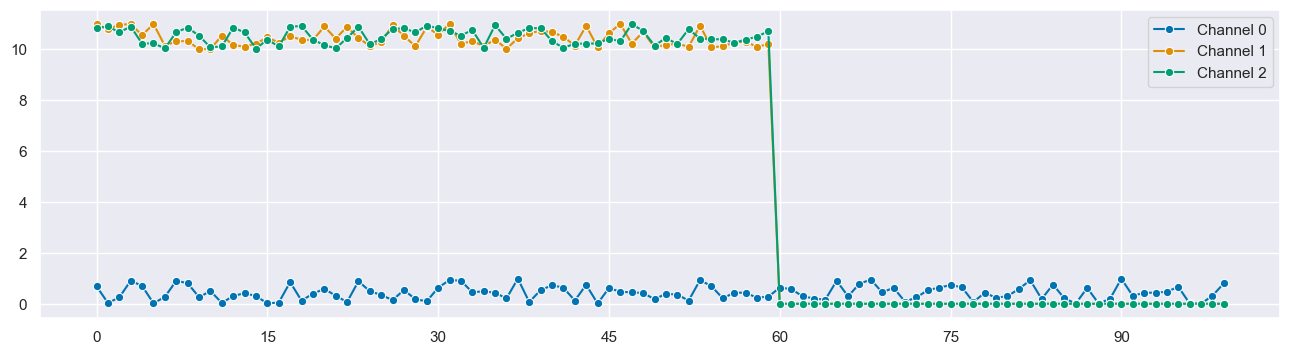

In [47]:
_ = plot_series(X.T, labels=["Channel 0", "Channel 1", "Channel 2"])

### 2. Apply Hidalgo Segmentation

The `HidalgoSegmenter` is initialized with various parameters that control the behavior of the algorithm. These parameters include the number of manifolds (`K`), local homogeneity level (`zeta`), number of points for local interaction (`q`), number of Gibbs sampling iterations (`n_iter`), and others. These parameters allow to customize the segmentation process according to data and requirements, while the `fit_predict` method is used to fit the Hidalgo model to the data and predict the segmentation labels using Neighborhood Calculation and Gibbs Sampling

In [20]:
hidalgo = HidalgoSegmenter(K=2, q=3, n_iter=2000, burn_in=0.8, seed=10)

labels = hidalgo.fit_predict(X, axis=0)
print("Found change points:", labels)

Found change points: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### 2.1 Visualize Segmentation Output

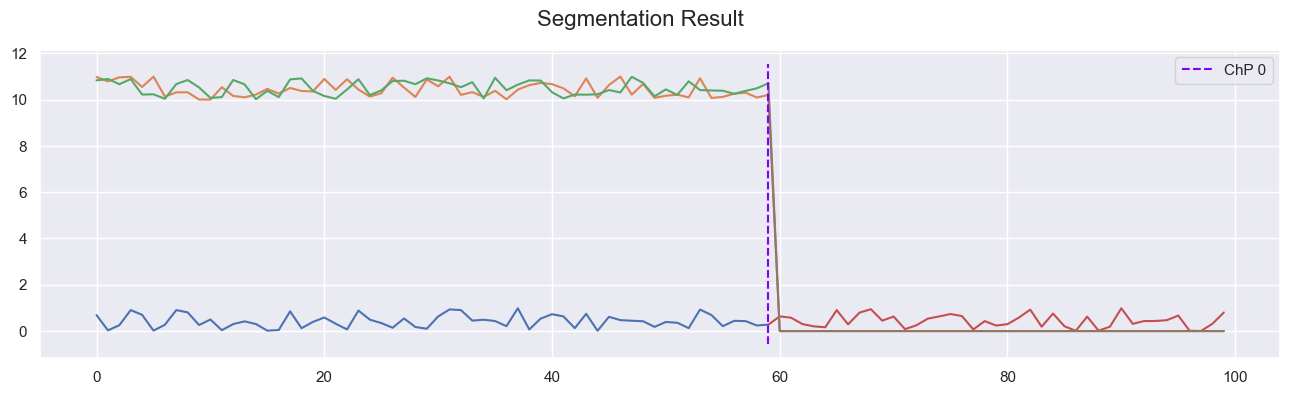

In [49]:
_ = plot_series_with_change_points(
    X, np.where(np.diff(labels) != 0)[0], "Segmentation Result"
)

## References

[1] Allegra, Michele, et al. "Data segmentation based on the local intrinsic dimension." [Scientific reports 10.1 (2020): 1-12.](https://www.nature.com/articles/s41598-020-72222-0)